# Visualization of POVMs

How to get basic visualization single-qubit POVMs (and products of them).

Let us first look at a classical shadows measurement.

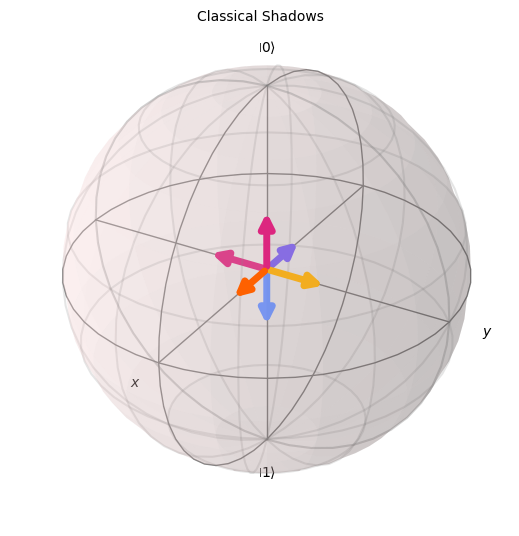

In [1]:
from povm_toolbox.library import ClassicalShadows

# Define the classical shadows measurement. It creates a trivial product POVM
# with only one single-qubit measurement.
cs = ClassicalShadows(1)
# Extract the single-qubit POVM from the product POVM.
sqpovm1 = cs.definition()[(0,)]
# Draw the Bloch vectors of the POVM.
sqpovm1.draw_bloch(title="Classical Shadows")

## Two different representations

Let us look as an example to showcast two possible representation of the Bloch vectors

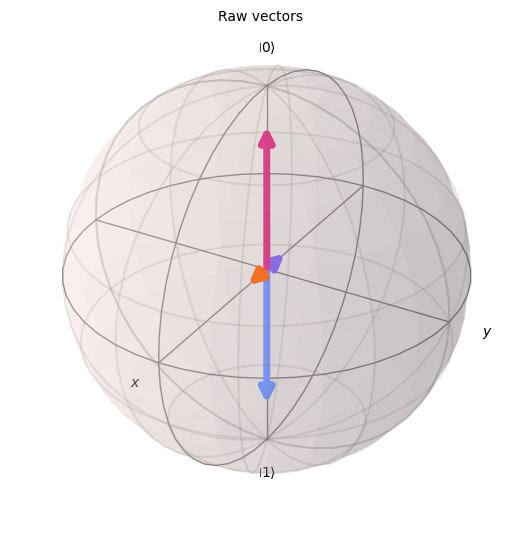

In [2]:
import matplotlib.pyplot as plt
from povm_toolbox.quantum_info import SingleQubitPOVM
from qiskit.quantum_info import Operator

# Directly define the single-qubit POVM
sqpovm2 = SingleQubitPOVM(
    [
        0.8 * Operator.from_label("0"),
        0.8 * Operator.from_label("1"),
        0.2 * Operator.from_label("+"),
        0.2 * Operator.from_label("-"),
    ]
)

# Draw the usual Bloch vectors. Since the last two effects have a small norm,
# it is difficult to visualize their direction.
sqpovm2.draw_bloch(title="Raw vectors")

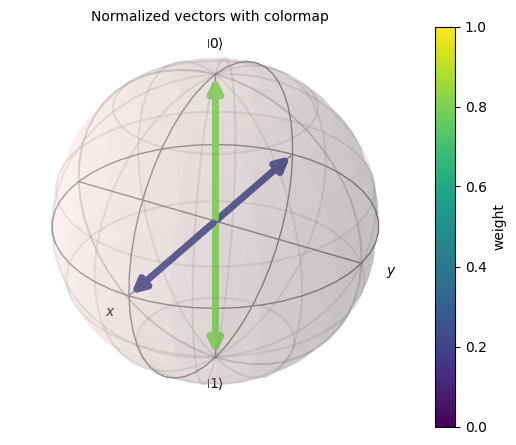

In [3]:
# Instead, we can normalize the vector and plot their norm as a colormap.
sqpovm2.draw_bloch(colorbar=True, title="Normalized vectors with colormap")

Another example with a symmetric and informationally-complete POVM (SIC-POVM)

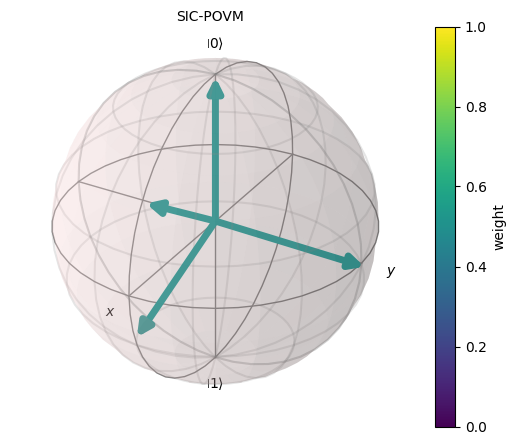

In [4]:
import cmath

import numpy as np

# Define a symmetric and informationally-complete POVM (SIC-POVM)
vecs = np.sqrt(1.0 / 2.0) * np.array(
    [
        [1, 0],
        [np.sqrt(1.0 / 3.0), np.sqrt(2.0 / 3.0)],
        [np.sqrt(1.0 / 3.0), np.sqrt(2.0 / 3.0) * cmath.exp(2.0j * np.pi / 3)],
        [np.sqrt(1.0 / 3.0), np.sqrt(2.0 / 3.0) * cmath.exp(4.0j * np.pi / 3)],
    ]
)

sic_povm = SingleQubitPOVM.from_vectors(vecs)
sic_povm.draw_bloch(title="SIC-POVM", colorbar=True)

## Drawing product POVM 

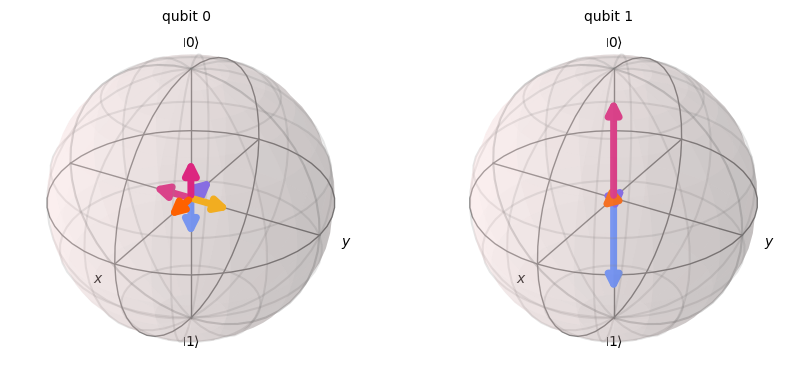

In [5]:
from povm_toolbox.quantum_info import ProductPOVM

prod_povm = ProductPOVM.from_list([sqpovm1, sqpovm2])
prod_povm.draw_bloch()

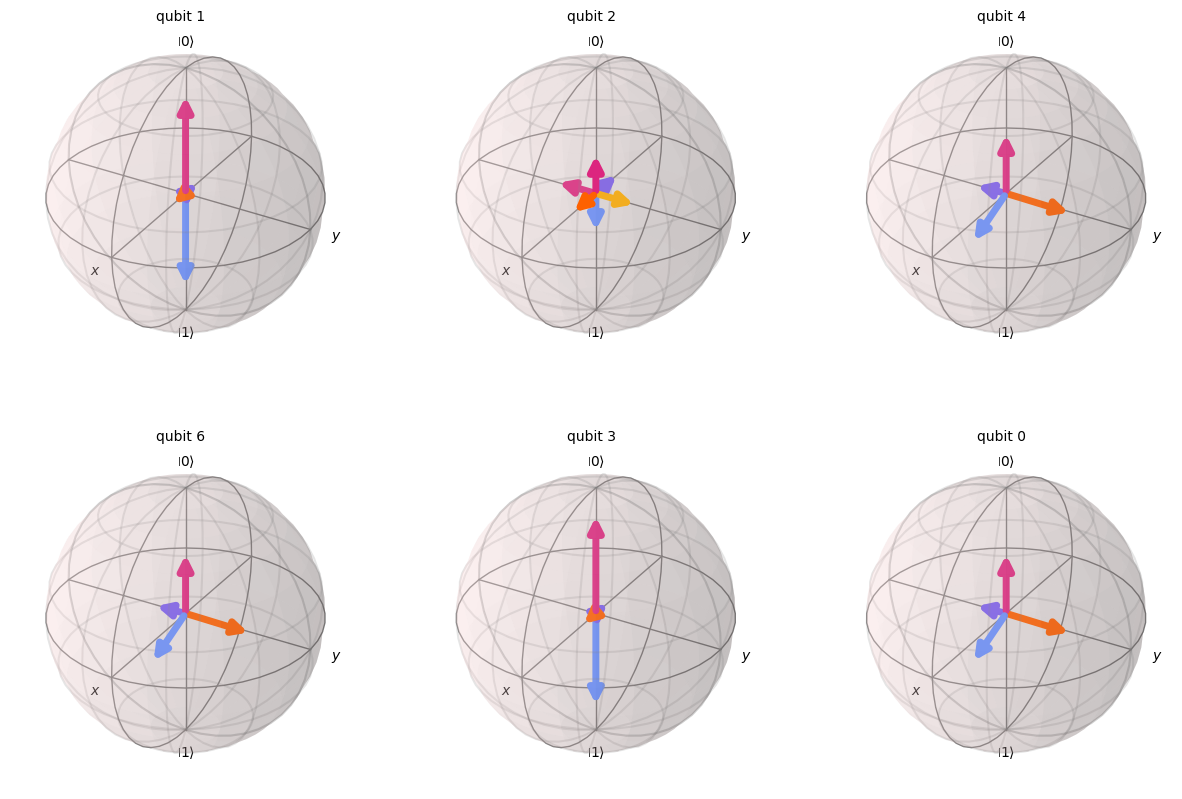

In [6]:
prod_povm = ProductPOVM(
    {(1,): sqpovm2, (2,): sqpovm1, (4,): sic_povm, (6,): sic_povm, (3,): sqpovm2, (0,): sic_povm}
)
prod_povm.draw_bloch()

## Plotting on a user-defined figure.

The user can define the figure and axes to be used to plot the Bloch vectors.

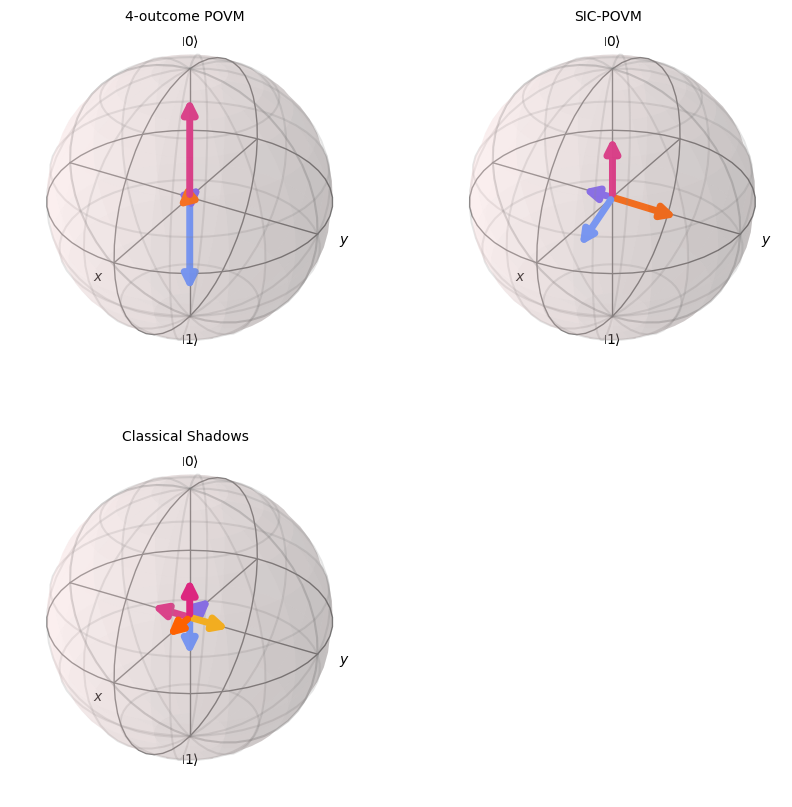

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1, projection="3d")
sqpovm2.draw_bloch(fig=fig, ax=ax, title="4-outcome POVM")

ax = fig.add_subplot(2, 2, 2, projection="3d")
sic_povm.draw_bloch(fig=fig, ax=ax, title="SIC-POVM")
ax = fig.add_subplot(2, 2, 3, projection="3d")
sqpovm1.draw_bloch(fig=fig, ax=ax, title="Classical Shadows")

plt.show()

## Further examples with increasing number of qubits

We look at classical shadows, locally-biased classical shadows and randomized projective measurements.

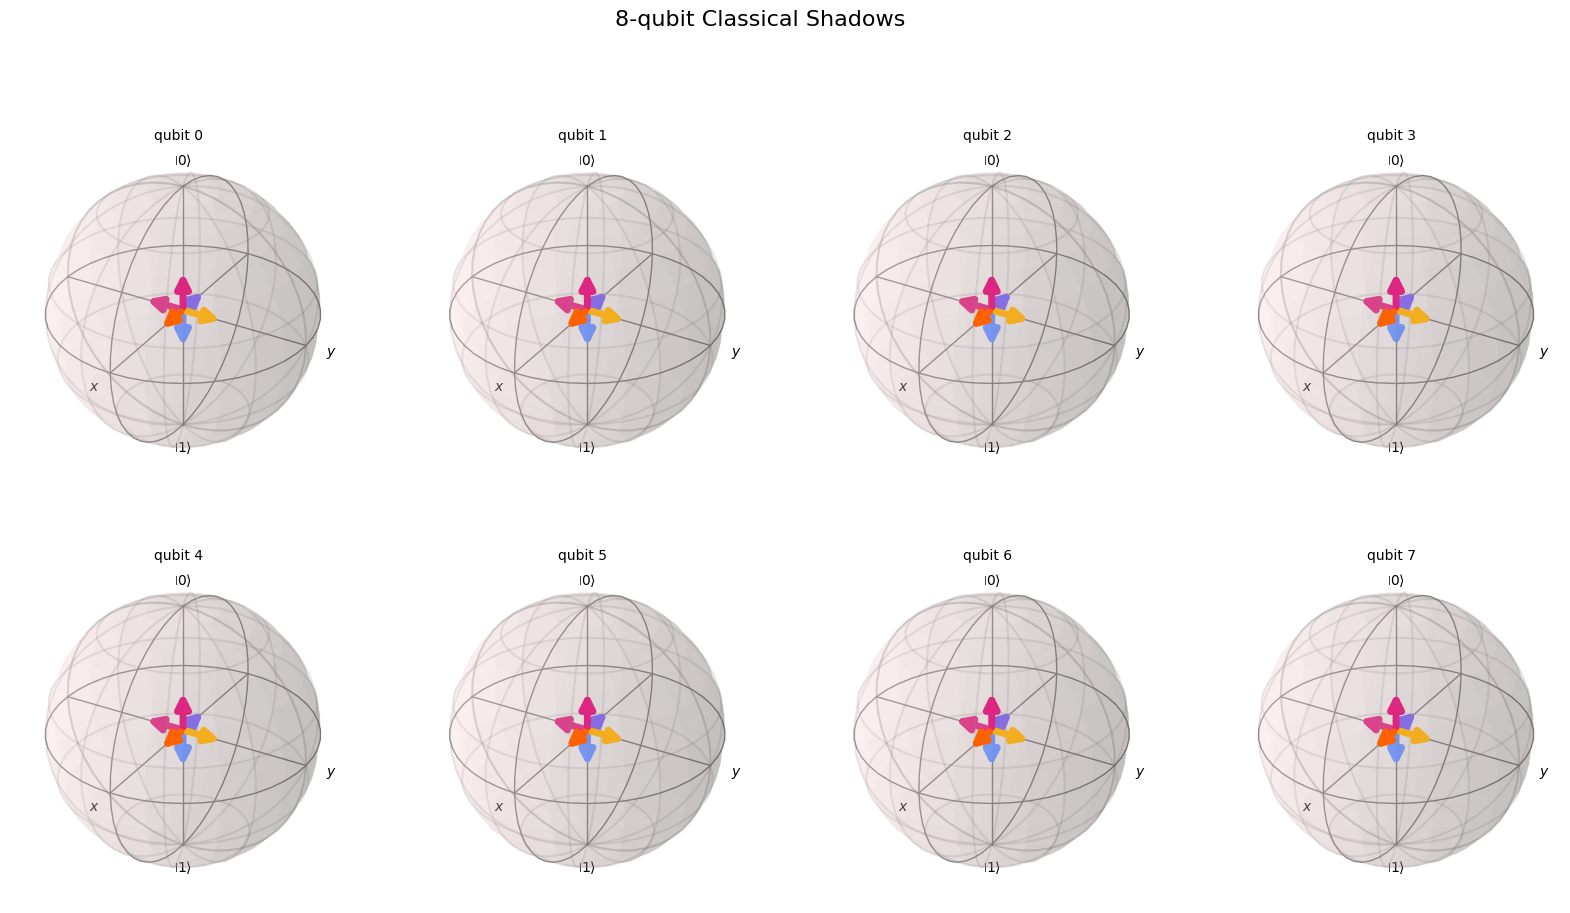

In [8]:
n_qubit = 8

cs_povm = ClassicalShadows(n_qubit).definition()
cs_povm.draw_bloch(title=f"{n_qubit}-qubit Classical Shadows")

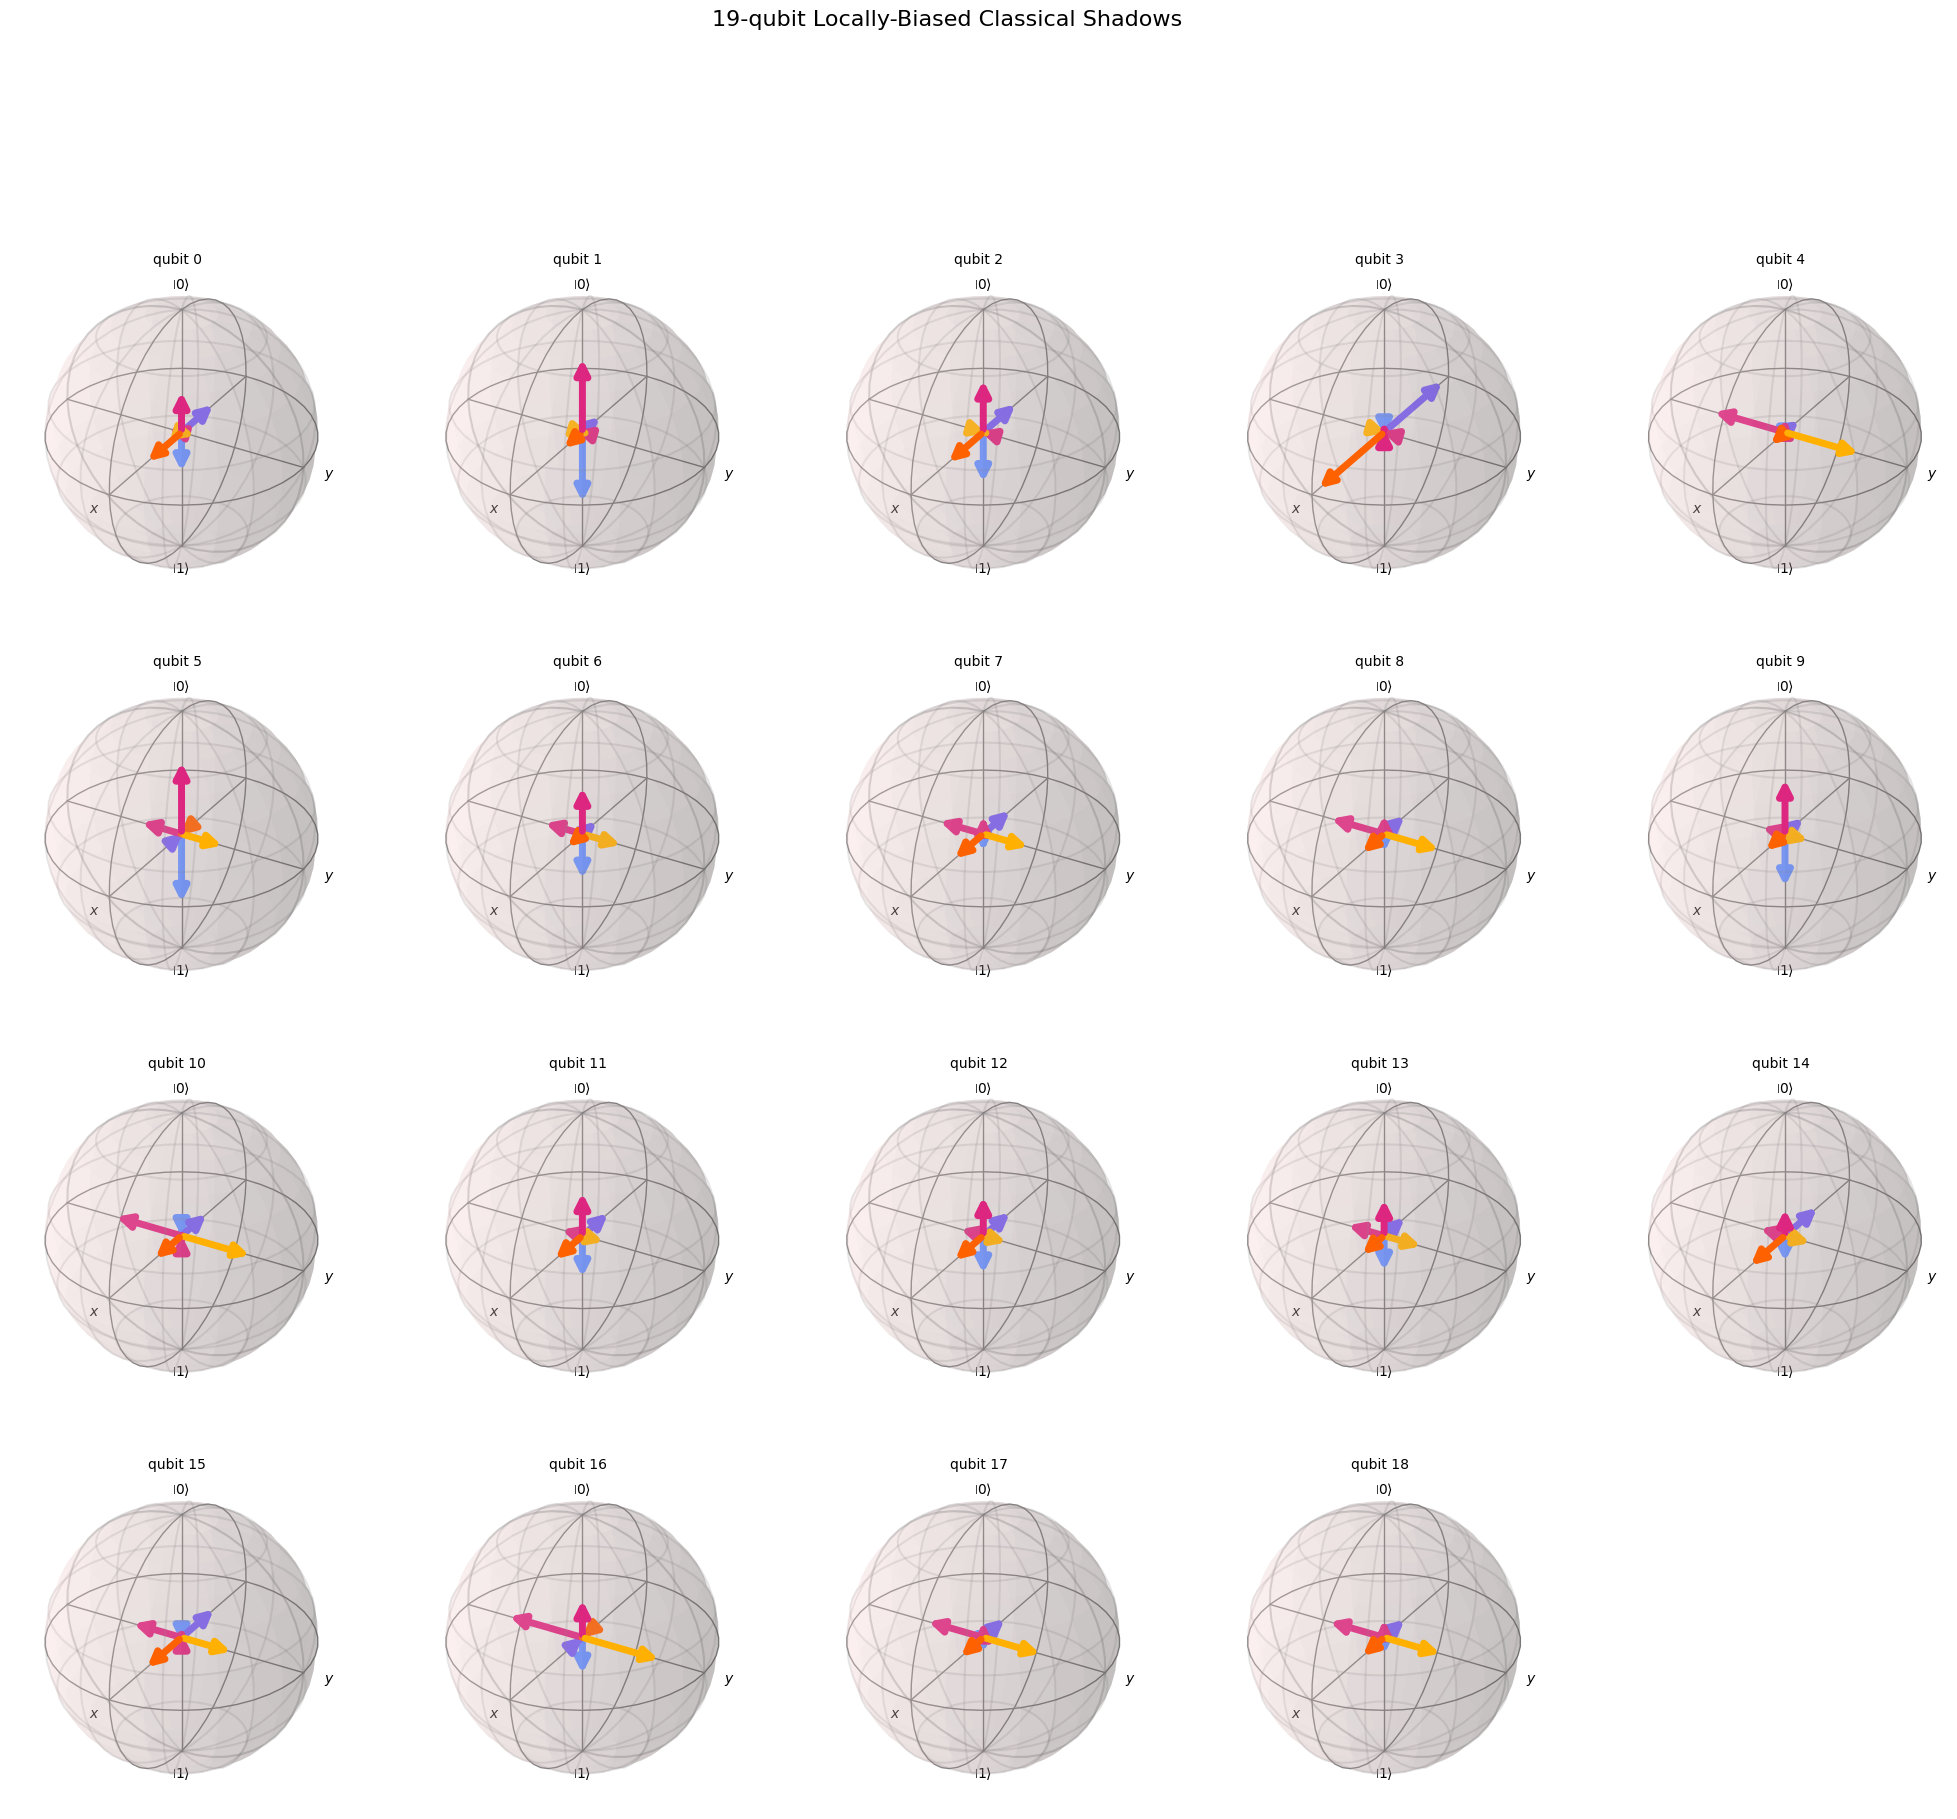

In [9]:
from povm_toolbox.library import LocallyBiasedClassicalShadows

n_qubit = 19

# Define the bias
bias = np.array(
    [
        [0.36094312, 0.50796196, 0.13109492],
        [0.62943668, 0.2935754, 0.07698793],
        [0.4560272, 0.51934089, 0.02463191],
        [0.05196344, 0.92902357, 0.01901299],
        [0.12965604, 0.23763234, 0.63271162],
        [0.61626697, 0.02046334, 0.36326969],
        [0.41067641, 0.24565853, 0.34366506],
        [0.16973604, 0.43348055, 0.39678341],
        [0.18148969, 0.34008117, 0.47842915],
        [0.47717857, 0.30436939, 0.21845204],
        [0.00546897, 0.4053871, 0.58914393],
        [0.381513, 0.41750024, 0.20098675],
        [0.34945753, 0.43306577, 0.21747669],
        [0.32524666, 0.34202124, 0.3327321],
        [0.24619264, 0.51835773, 0.23544963],
        [0.04301446, 0.52050851, 0.43647703],
        [0.3361605, 0.0079976, 0.6558419],
        [0.15042373, 0.35211066, 0.49746561],
        [0.17035462, 0.33837793, 0.49126745],
    ]
)

cs_povm = LocallyBiasedClassicalShadows(n_qubit, bias=bias).definition()
cs_povm.draw_bloch(title=f"{n_qubit}-qubit Locally-Biased Classical Shadows")

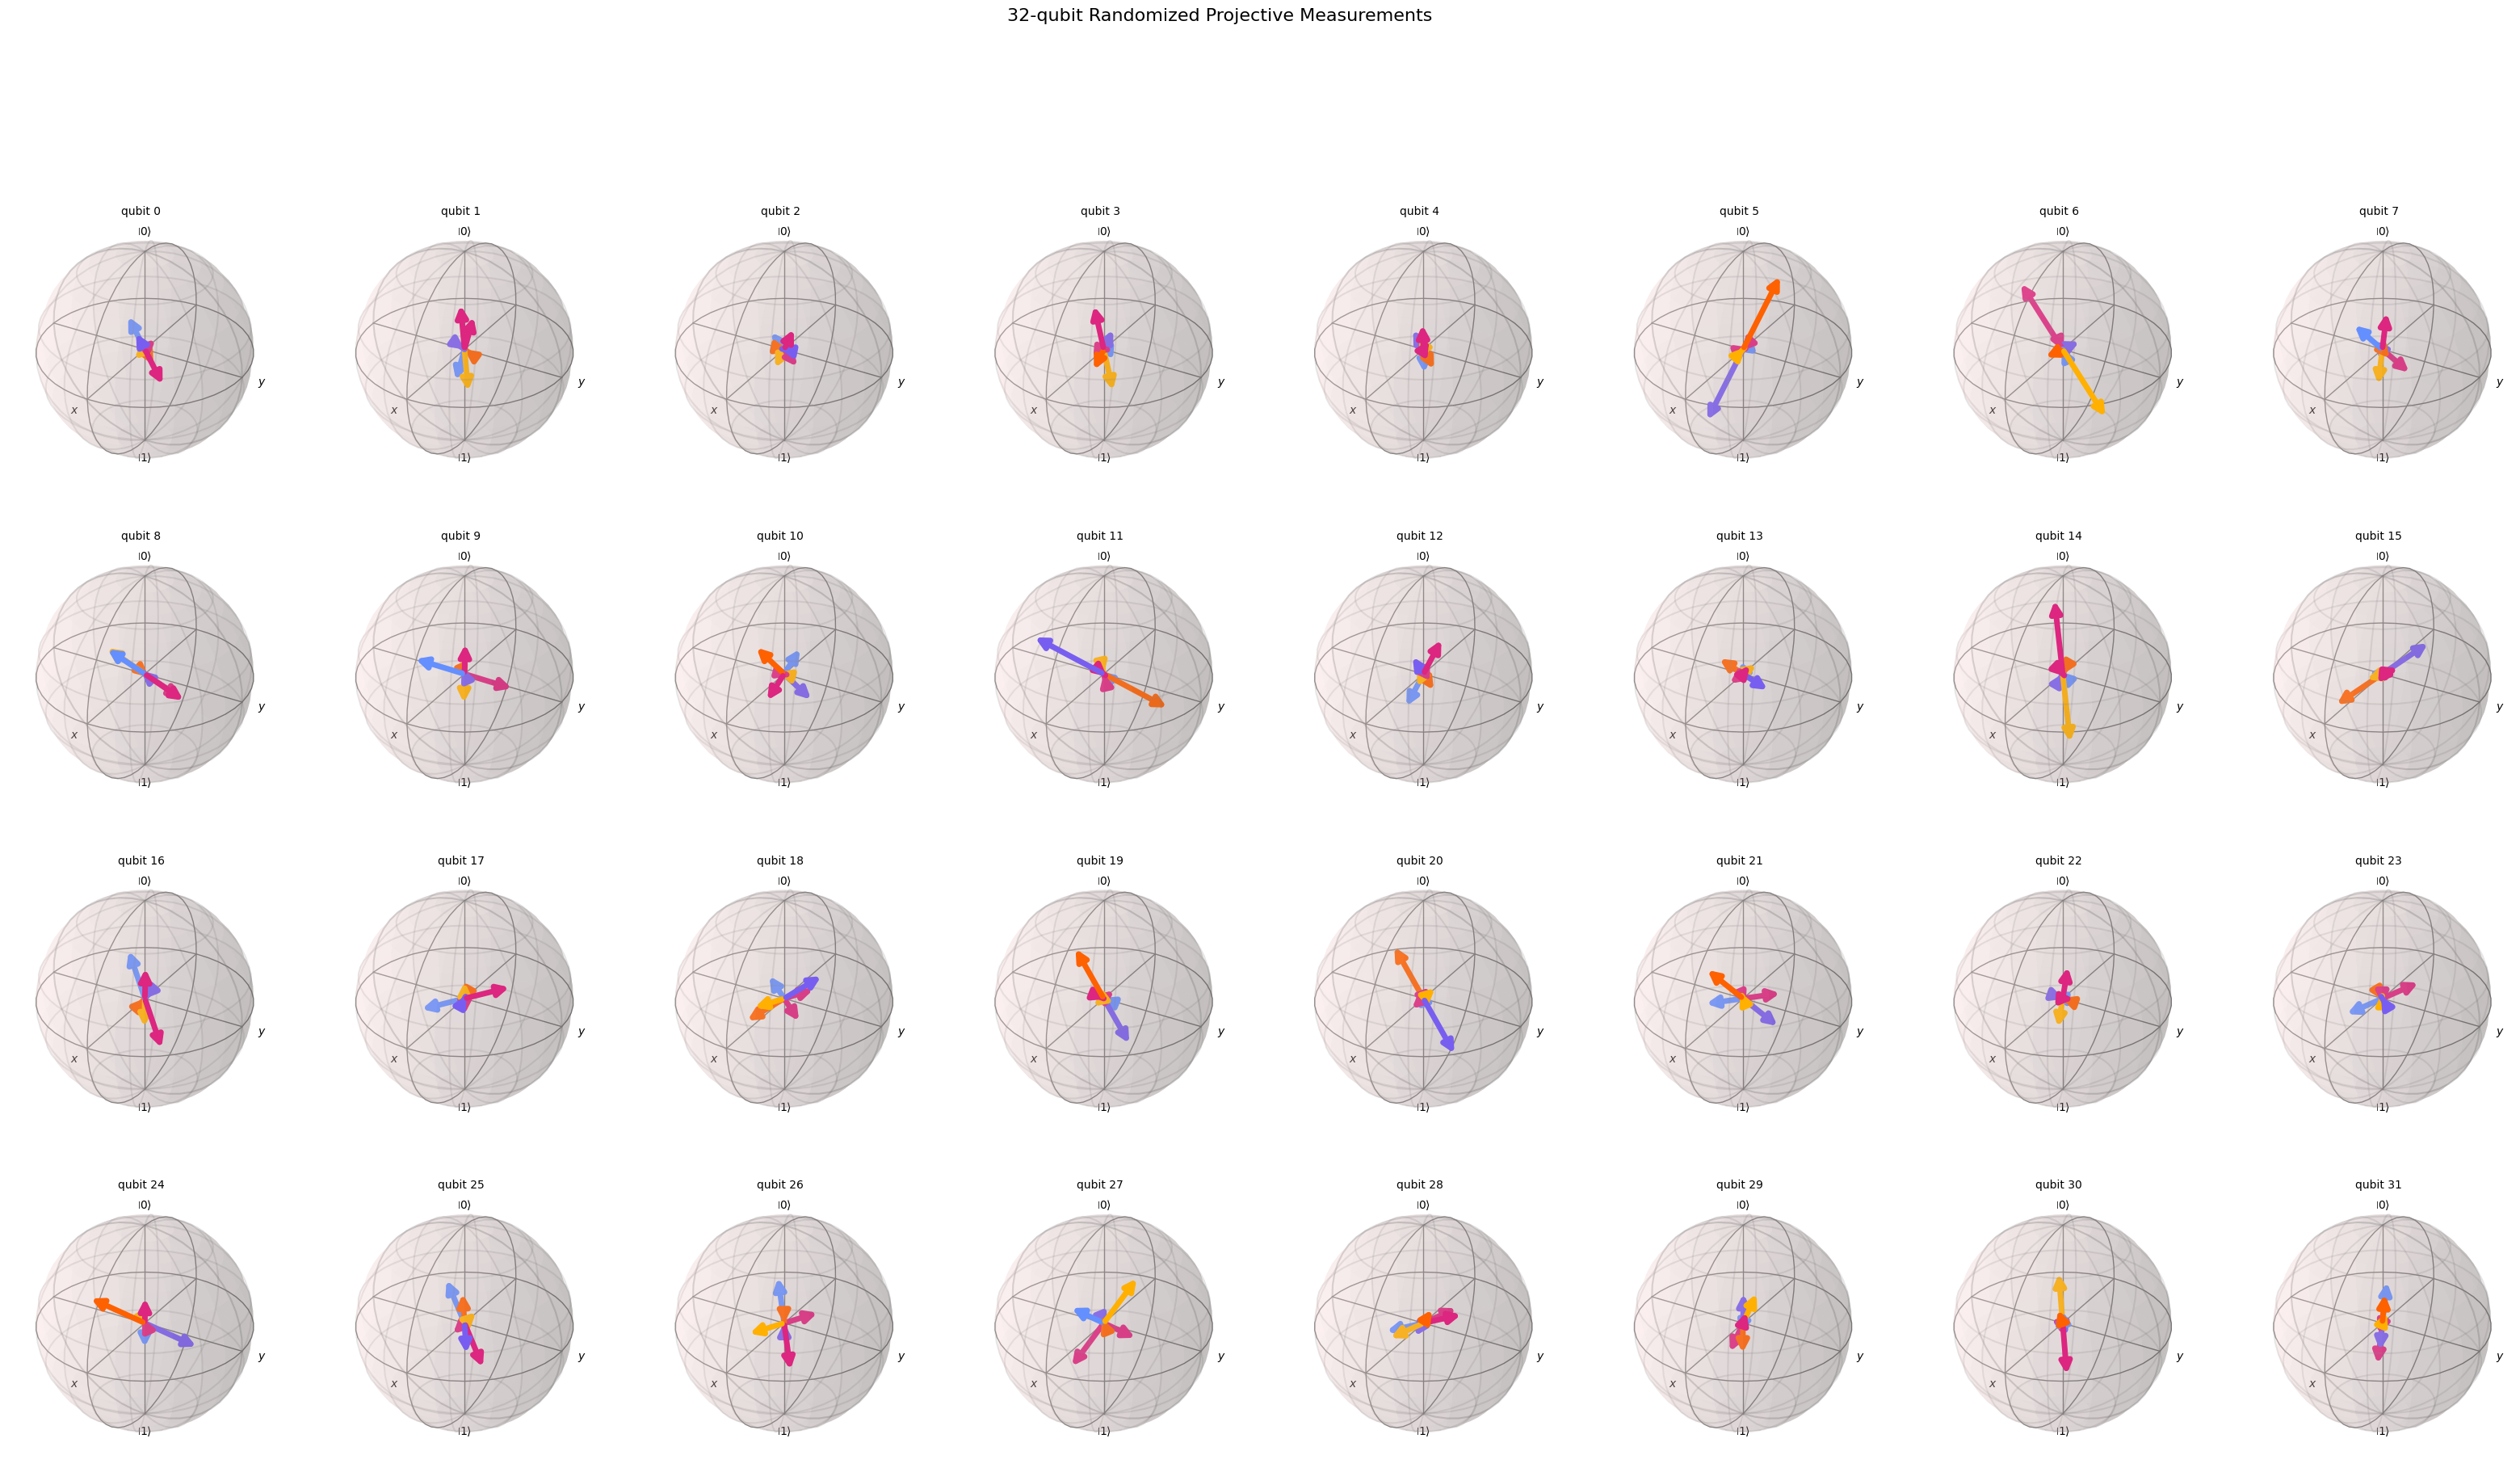

In [10]:
from povm_toolbox.library import RandomizedProjectiveMeasurements

n_qubit = 32

# Choose the angles at random
phi = 2 * np.pi * np.random.uniform(0, 1, size=3 * n_qubit).reshape((n_qubit, 3))
theta = np.arccos(2 * np.random.uniform(0, 1, size=3 * n_qubit).reshape((n_qubit, 3)) - 1.0)
angles = np.concatenate((theta, phi), axis=1)

# Also choose the bias at random
bias = np.random.uniform(0, 1, size=3 * n_qubit).reshape((n_qubit, 3))
bias /= bias.sum(axis=1)[:, np.newaxis]

cs_povm = RandomizedProjectiveMeasurements(n_qubit, bias=bias, angles=angles).definition()
cs_povm.draw_bloch(title=f"{n_qubit}-qubit Randomized Projective Measurements")

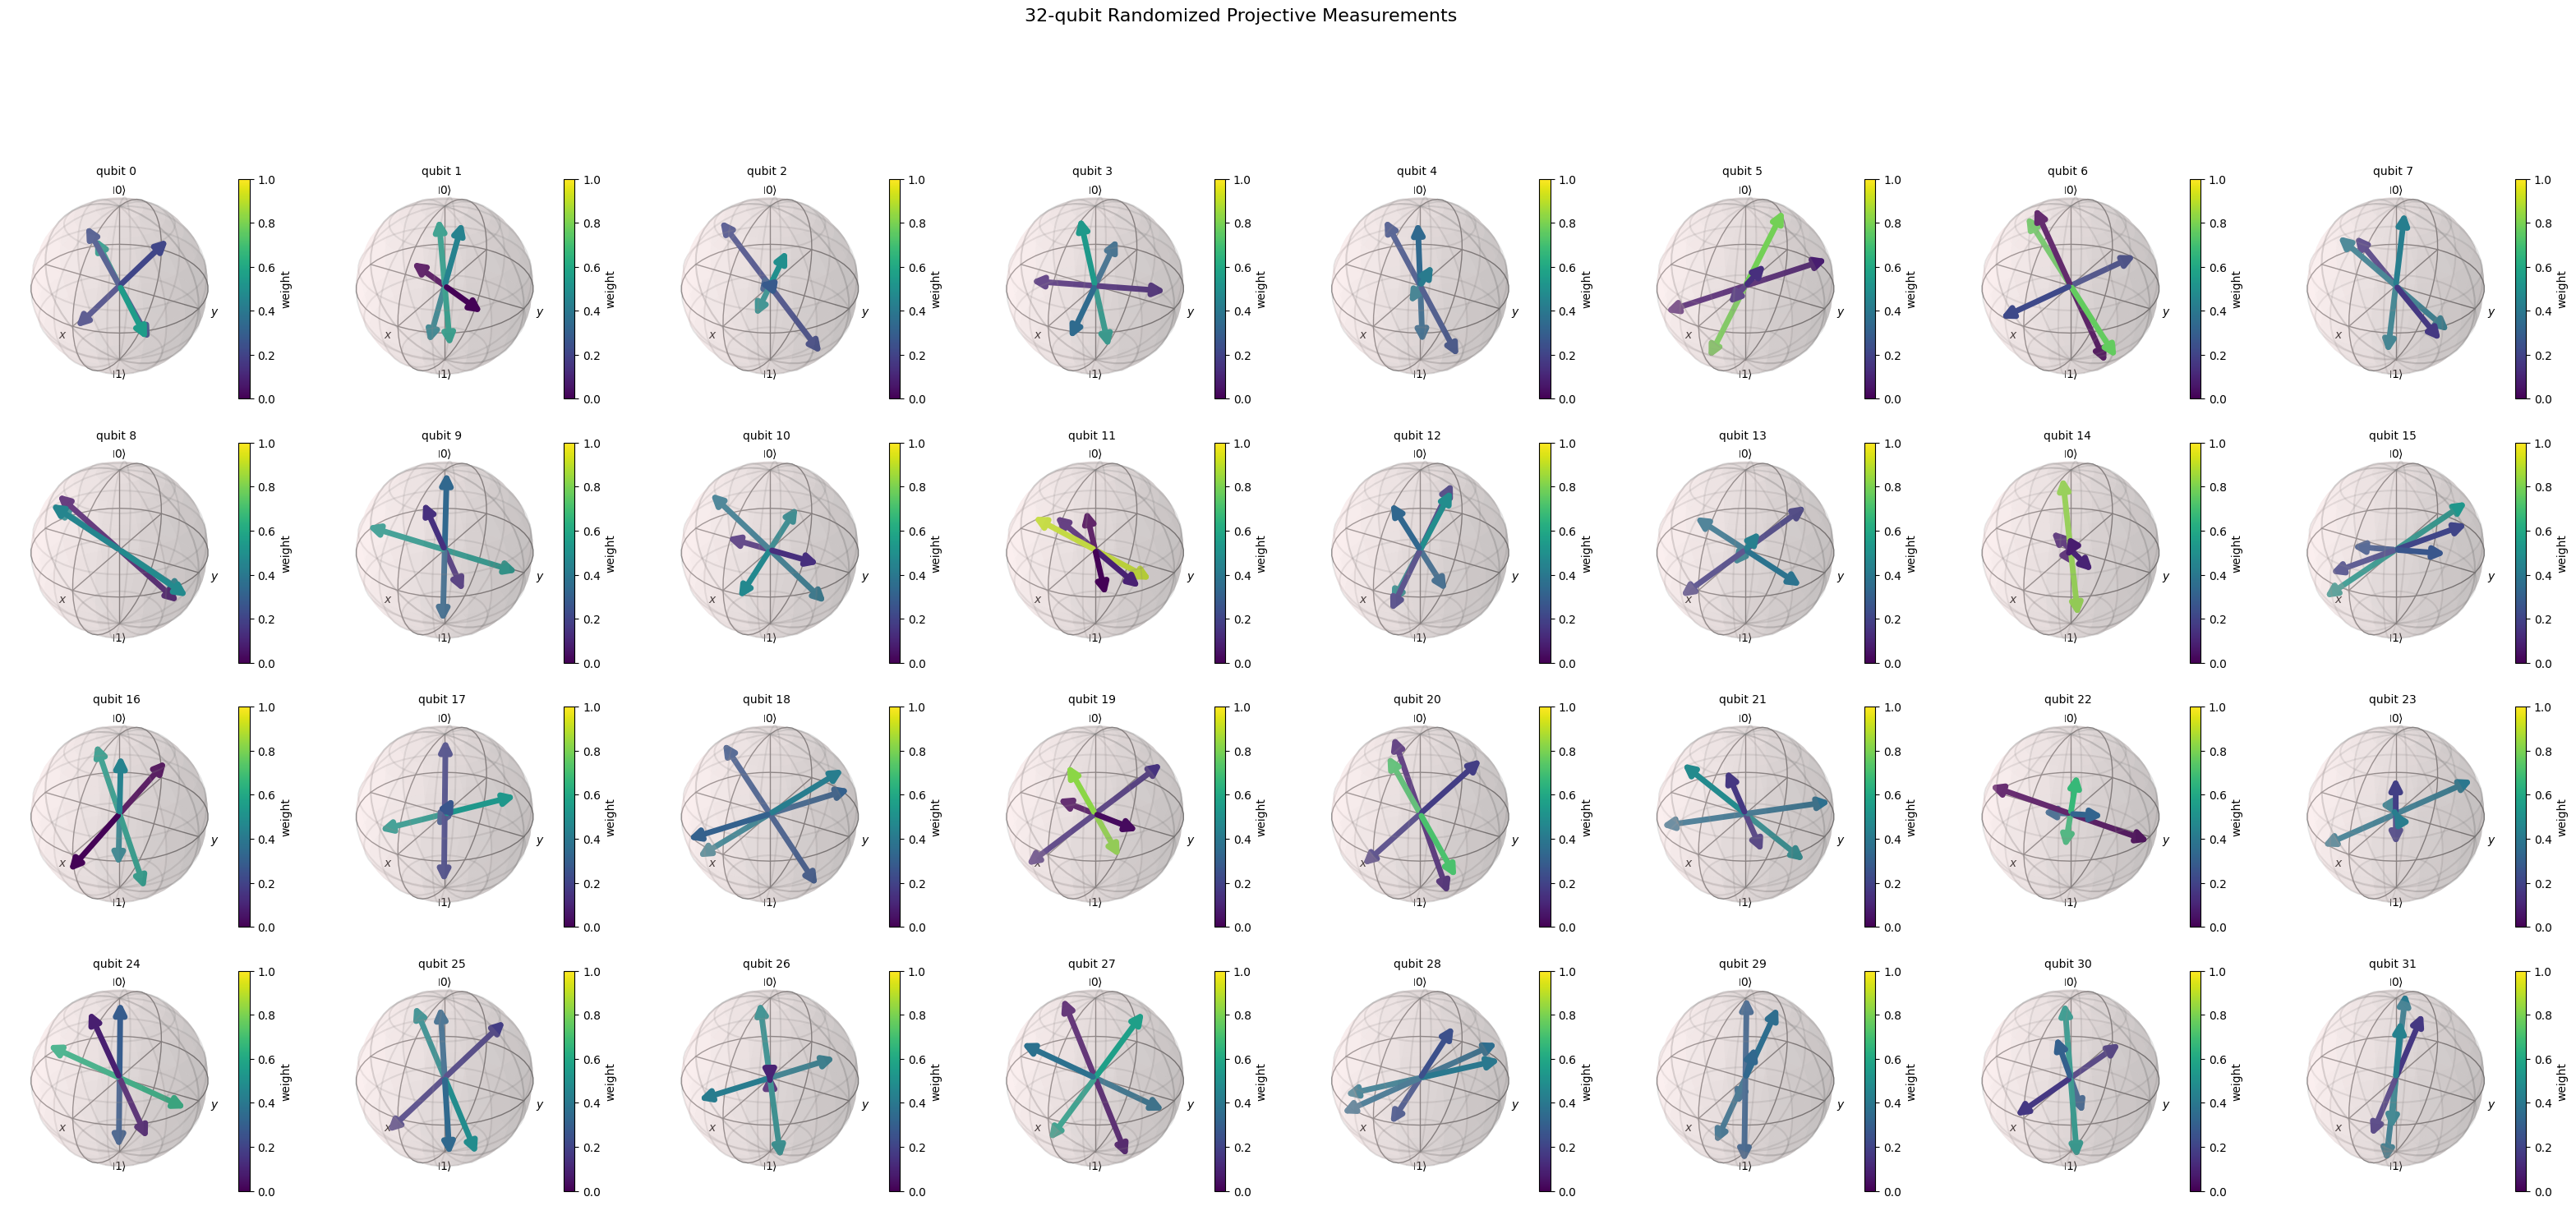

In [11]:
cs_povm.draw_bloch(colorbar=True, title=f"{n_qubit}-qubit Randomized Projective Measurements")